In [2]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [69]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [70]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [71]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [72]:
model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [73]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.1401
Epoch [1/5], Step [200/600], Loss: 0.0931
Epoch [1/5], Step [300/600], Loss: 0.0675
Epoch [1/5], Step [400/600], Loss: 0.1176
Epoch [1/5], Step [500/600], Loss: 0.1276
Epoch [1/5], Step [600/600], Loss: 0.0567
Epoch [2/5], Step [100/600], Loss: 0.0667
Epoch [2/5], Step [200/600], Loss: 0.0236
Epoch [2/5], Step [300/600], Loss: 0.0165
Epoch [2/5], Step [400/600], Loss: 0.0405
Epoch [2/5], Step [500/600], Loss: 0.0622
Epoch [2/5], Step [600/600], Loss: 0.0326
Epoch [3/5], Step [100/600], Loss: 0.0246
Epoch [3/5], Step [200/600], Loss: 0.0093
Epoch [3/5], Step [300/600], Loss: 0.0365
Epoch [3/5], Step [400/600], Loss: 0.0114
Epoch [3/5], Step [500/600], Loss: 0.0478
Epoch [3/5], Step [600/600], Loss: 0.0021
Epoch [4/5], Step [100/600], Loss: 0.0327
Epoch [4/5], Step [200/600], Loss: 0.0066
Epoch [4/5], Step [300/600], Loss: 0.0063
Epoch [4/5], Step [400/600], Loss: 0.0283
Epoch [4/5], Step [500/600], Loss: 0.0109
Epoch [4/5], Step [600/600], Loss:

In [74]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.94 %


In [75]:
def drawSymbol(testArray,arrayRange):
    dataiter = iter(testArray)
    myimages, labels = dataiter.next()
    myimages = myimages.numpy()
    # Peeking into dataset
    fig = plt.figure(figsize=(25, 4))
    for image in np.arange(arrayRange):
        ax = fig.add_subplot(2, 20/2, image+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(myimages[image]), cmap='gray')
        ax.set_title(str(labels[image].item()))

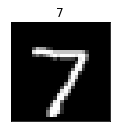

In [76]:
drawSymbol(test_loader,1)

In [77]:
def load_dataset():
    data_path = 'data/test/'
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()
        ])
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=1,
        num_workers=0,
        shuffle=False
    )
    return train_loader

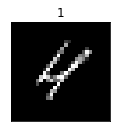

In [99]:
drawSymbol(load_dataset(),1)

In [100]:
#external dataset testing
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in load_dataset():
        #print(len(images),len(labels))
        images = images.to(device)        
        labels = labels.to(device)
        #print(type(images))
        #print(images.shape)
        outputs = model(images)

In [101]:
outputs

tensor([[-7.5749, -6.5254, -3.2973, -6.1618,  2.7998, -5.4755, -6.7113, -3.8188,
         -1.0687, -5.5204]], device='cuda:0')